# Chapter 3. Classification

## MNIST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x, y = mnist["data"], mnist["target"]
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib as mpl

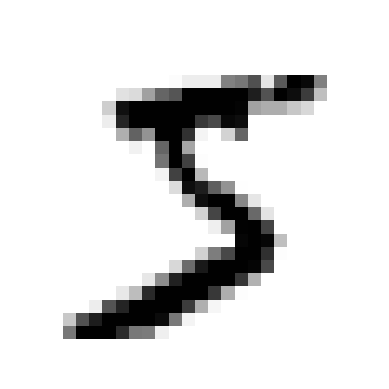

In [6]:
# some_degit = x.iloc[0].values # another way to get numpy array from pandas dataframe
some_degit = x.to_numpy()[0] # converting pandas dataframe to numpy array and getting first row
some_degit_image = some_degit.reshape(28, 28) # reshaping 1D array to 2D array of 28x28
plt.imshow(some_degit_image, cmap="binary") # displaying image in binary color map
plt.axis("off") # turning off axis
plt.show() # displaying the plot

In [7]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y[0] # the label of the first digit

'5'

In [9]:
y = y.astype(np.uint8)

In [10]:
y.shape

(70000,)

In [11]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [12]:
x_train, x_test, y_train, y_test = x.iloc[:60000], x.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

## Training a Binary Classifier

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent Classifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [15]:
sgd_clf.predict([some_degit]) # predicting if the first digit is 5 or not

d:\sahoreia\Python\Machine Learning exploring\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [16]:
sgd_clf.predict([x.iloc[36000]])

d:\sahoreia\Python\Machine Learning exploring\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [17]:
sgd_clf.score(x_test, y_test_5)

0.9492

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test_5, sgd_clf.predict(x_test))

0.9492

In [19]:
precision_score(y_test_5, sgd_clf.predict(x_test))

0.6618887015177066

In [20]:
recall_score(y_test_5, sgd_clf.predict(x_test))

0.8800448430493274

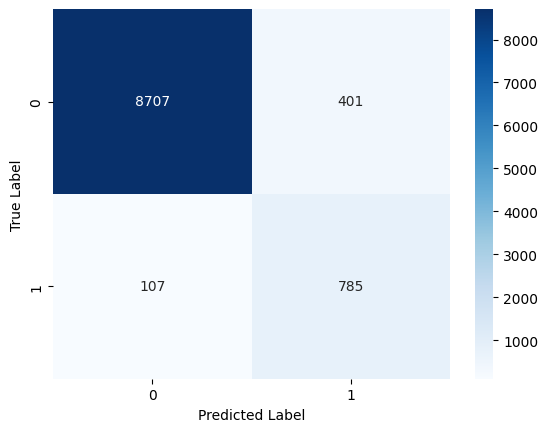

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, sgd_clf.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Performance Measures

## Measuring Accuracy Using Cross-Validation

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfold.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf) # creating a copy of the SGD classifier

    x_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]

    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(x_train_folds, y_train_folds) # training the classifier on the training folds
    y_pred = clone_clf.predict(x_test_fold) # making predictions on the test fold

    accuracy = (y_pred == y_test_fold).mean() # calculating the accuracy of the predictions
    print(accuracy)


0.9042
0.9477
0.96785


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [24]:
from sklearn.base import BaseEstimator # importing the base estimator class

class Never5Classifer(BaseEstimator):
    def fit(self, x, y=None): # this method is not used
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool) # always predicts 'not 5'

In [25]:
never_5_clf = Never5Classifer()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [27]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
y_train_perfect_prediction = y_train_5 # pretend we have a perfect classifier
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [30]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [32]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Precision/Recall Trade-off

In [33]:
y_scoes = sgd_clf.decision_function([some_degit]) # returns the decision function values for the given samples
y_scoes

d:\sahoreia\Python\Machine Learning exploring\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [34]:
threshhold = 0
y_some_digit_pred = (y_scoes > threshhold)
y_some_digit_pred

array([ True])

In [35]:
threshhold = 8000
y_some_digit_pred = (y_scoes > threshhold)
y_some_digit_pred

array([False])

In [36]:
y_scoes = cross_val_predict(
    sgd_clf, x_train, y_train_5, cv=3, method="decision_function"
)  # returns the decision function values for the given samples
y_scoes

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresolds = precision_recall_curve(y_train_5, y_scoes)

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, threshholds):
    plt.plot(threshholds, precisions[:-1], "b--", label="Precision")
    plt.plot(threshholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.grid()

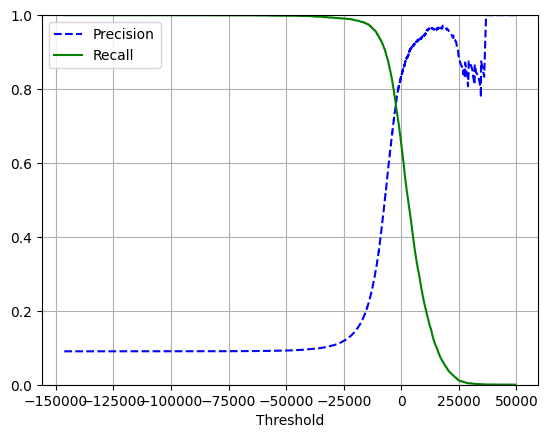

In [39]:
plot_precision_recall_vs_threshold(precisions, recalls, thresolds)
plt.show()

In [40]:
threshhold_90_precision = thresolds[np.argmax(precisions >= 0.90)]
print(threshhold_90_precision)

3370.0194991439557


In [41]:
y_train_pred_90 = (y_scoes >= threshhold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False], shape=(60000,))

In [42]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, threshholds = roc_curve(y_train_5, y_scoes)

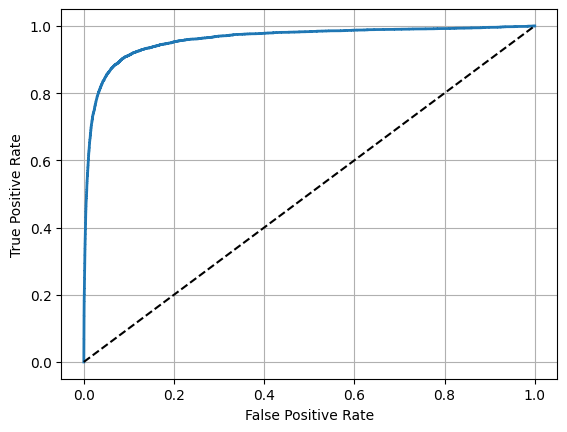

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
plot_roc_curve(fpr, tpr)
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
y_scores = y_scoes
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(
    forest_clf, x_train, y_train_5, cv=3, method="predict_proba"
)

In [48]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

In [49]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06], shape=(60000,))

In [50]:
fpr_forest, tpr_forest, threshholds_forest = roc_curve(y_train_5, y_scores_forest)

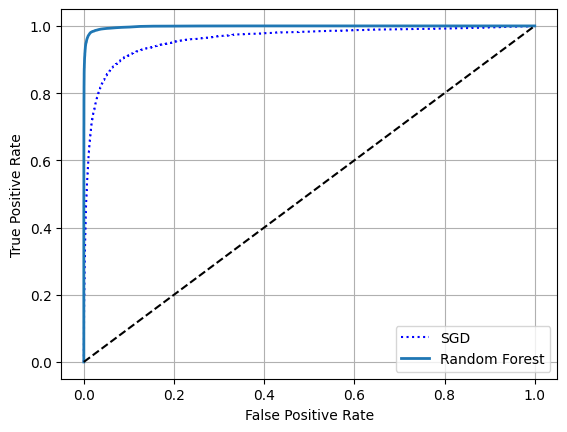

In [51]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145